In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join as oj

In [13]:
# get all of the dataids in results/pipeline2
dataids = []
for filename in os.listdir('results/nonl2unsignedunnormed'):
    # get last six characters of filename
    dataids.append(filename[6:])
dataids

['361272',
 '7592',
 '361237',
 '9971',
 '3903',
 '14954',
 '361261',
 '361259',
 '361253',
 '3021',
 '125920',
 '361619',
 '361254',
 '9957',
 '361621',
 '3904',
 '361266',
 '9976',
 '361247',
 '3917',
 '3913',
 '9978',
 '361249',
 '361243',
 '361234',
 '10101',
 '361617',
 '14965',
 '361250',
 '146820',
 '361257',
 '361622',
 '31',
 '361244',
 '167141',
 '9977',
 '361255',
 '361618',
 '361267',
 '14952',
 '3902',
 '361260',
 '49',
 '43',
 '219',
 '361252',
 '361258',
 '167120',
 '15',
 '361241',
 '361236',
 '29',
 '9946',
 '361256',
 '361623',
 '361264',
 '10093',
 '9952',
 '361269',
 '37',
 '146819',
 '3',
 '361251',
 '361616',
 '3918',
 '361235',
 '361242']

In [14]:
# set the path we want to look at
# dataids = ["361242", "361251", "361253", "361259", "361260"]
# dataids = ["361242", "361251", "361253", "361254", "361256", "361259", "361260", "361622"]
seed = "1"
metric = "rmse"
pipeline = 2
clustertype = "hierarchical"
paths = []
for dataid in dataids:
    #paths.append(oj("results", f"pipeline{pipeline}", f"dataid{dataid}", f"seed{seed}", f"metric{metric}", str(clustertype)))
    paths.append(oj("results", "nonl2unsignedunnormed", f"dataid{dataid}", f"seed{seed}", f"metric{metric}", str(clustertype)))

In [15]:
data_results = []
for path in paths:
    # if path exists
    if not os.path.exists(path):
        continue
    files = os.listdir(path)
    method_results = []
    for file in files:
        method_result = pd.read_csv(oj(path, file))
        method_result = method_result.rename(columns={"rmse": file[:-4]})
        method_results.append(method_result)
    data_result = pd.concat(method_results, axis=1)
    data_result = data_result.loc[:, ~data_result.columns.str.contains('^Unnamed')]
    data_result = data_result.loc[:, ~data_result.columns.duplicated()]
    data_results.append(data_result)

In [16]:
# in each data_result, keep only nclust, lmdi_lasso, lmdi_ridge, shap, lime, rawdata
for i in range(len(data_results)):
    data_results[i] = data_results[i][["nclust", "lmdi_ridge", "shap", "lime", "rawdata"]]

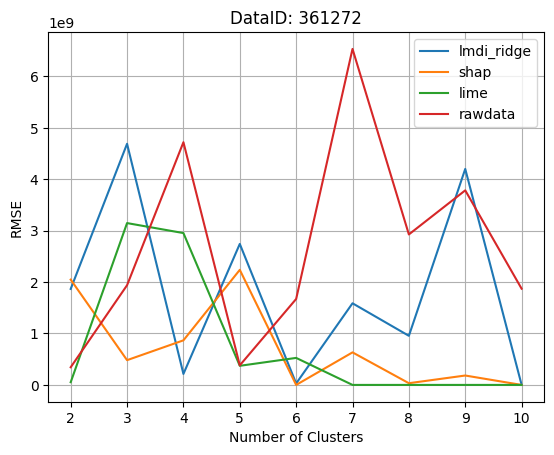

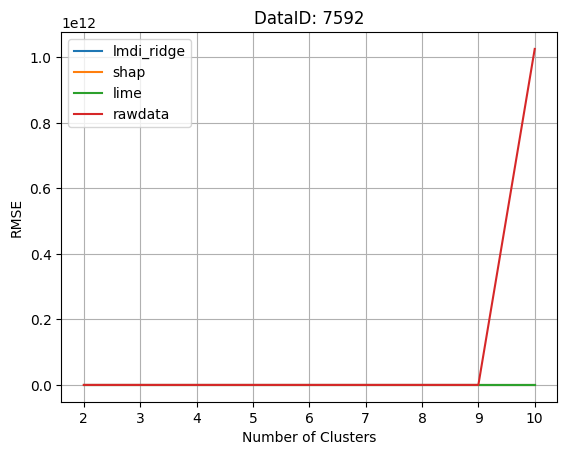

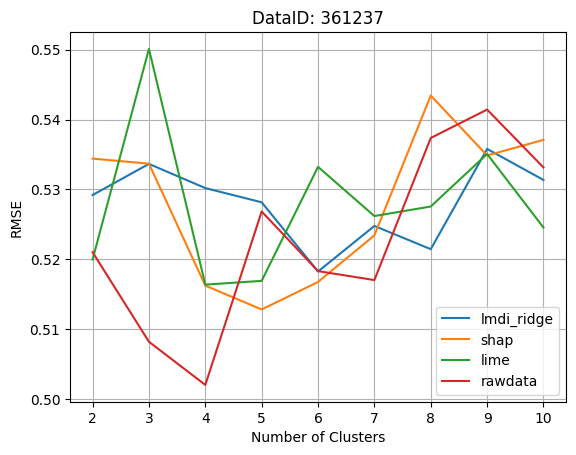

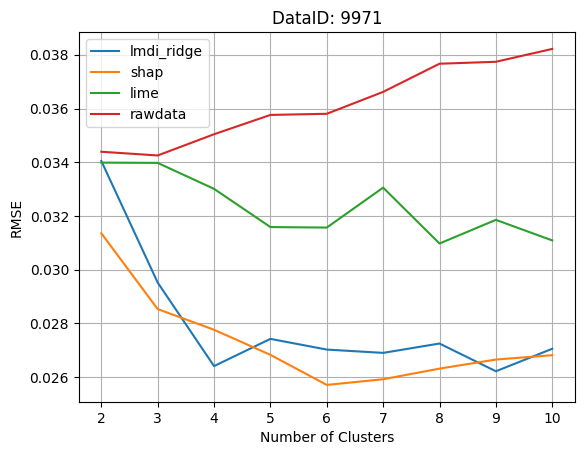

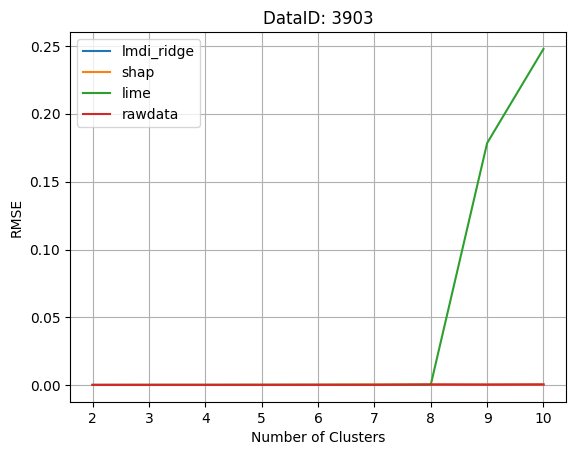

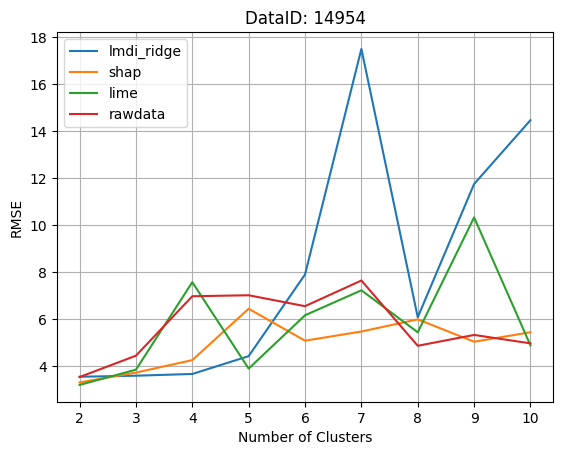

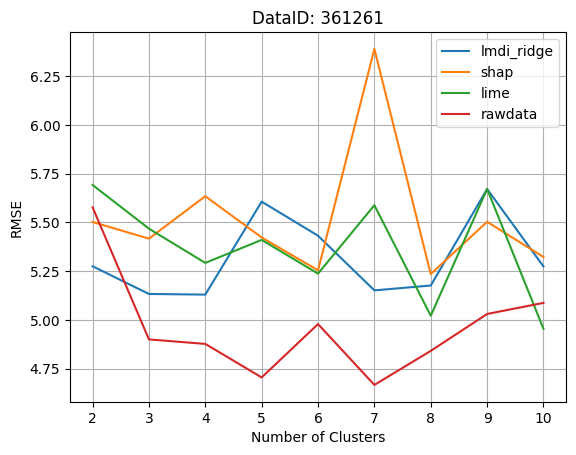

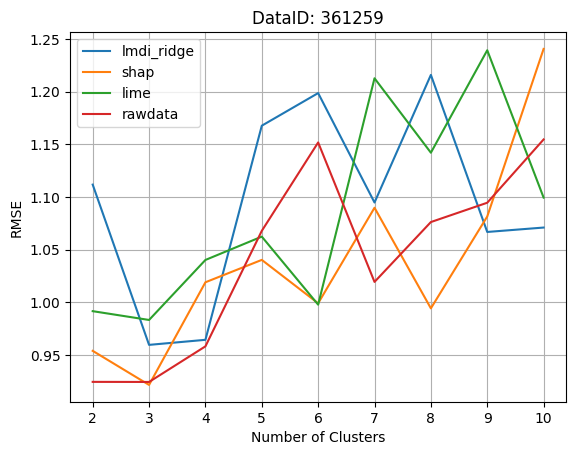

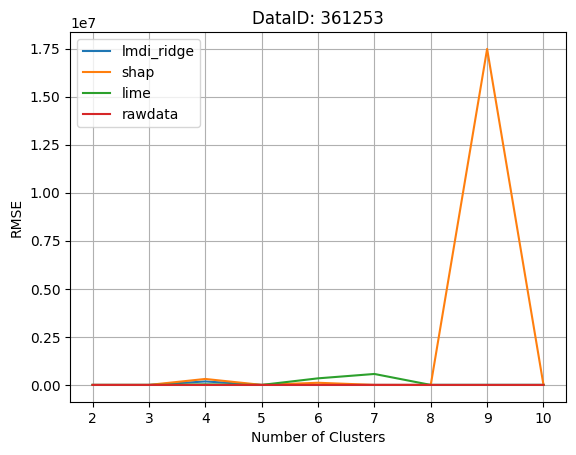

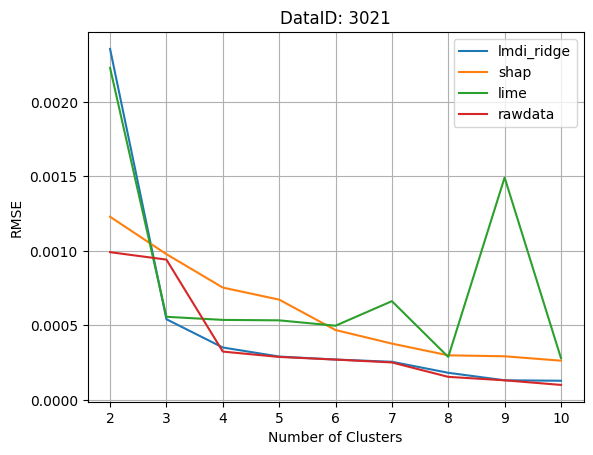

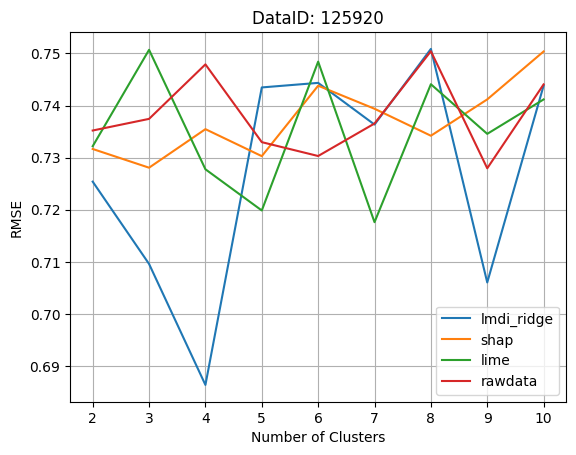

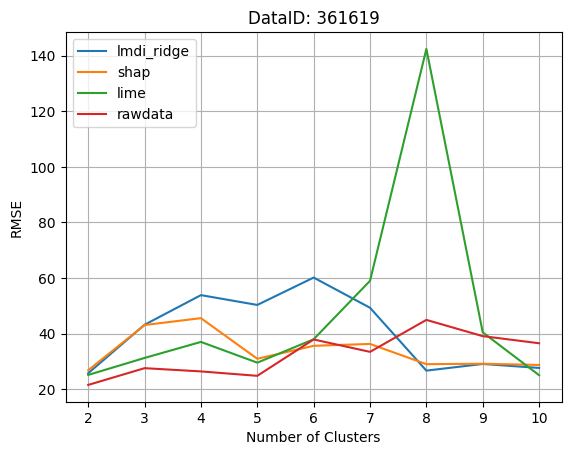

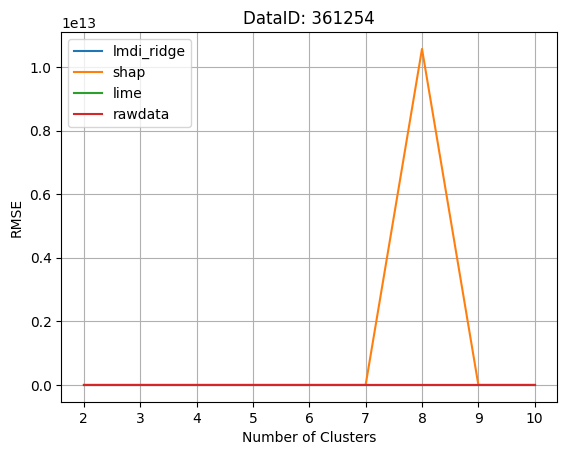

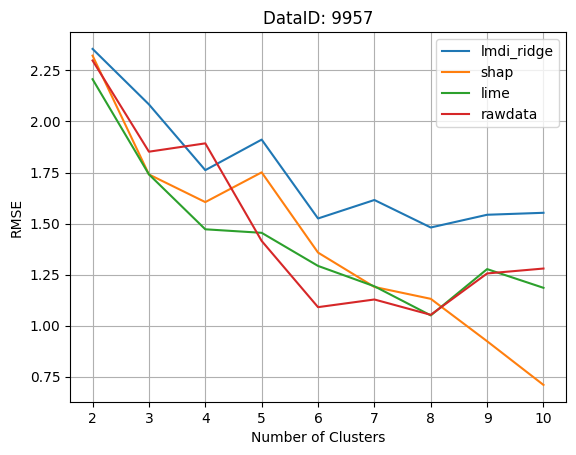

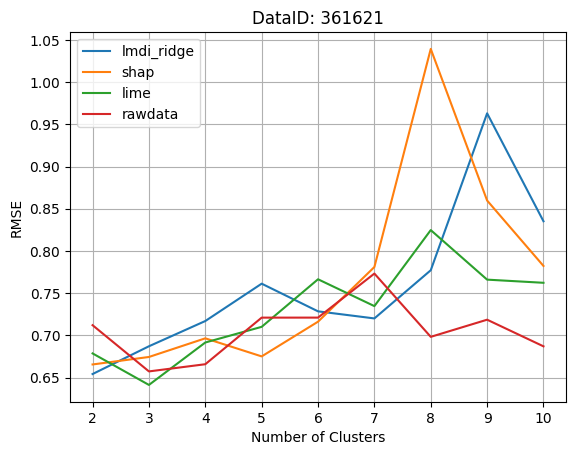

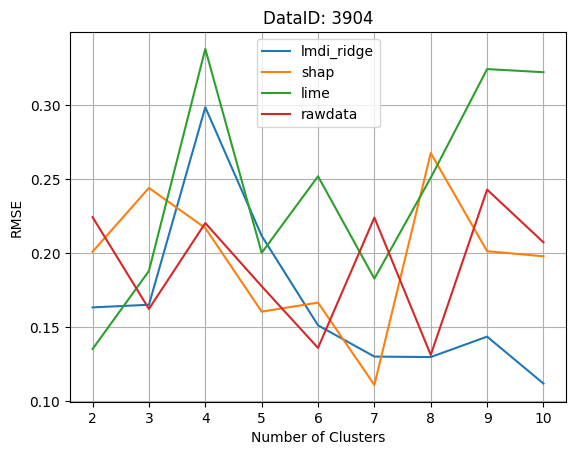

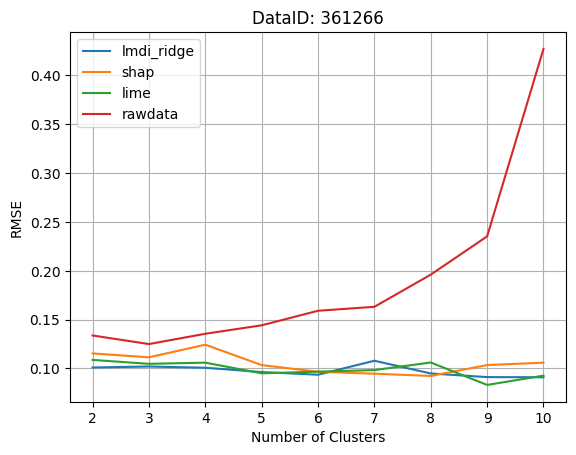

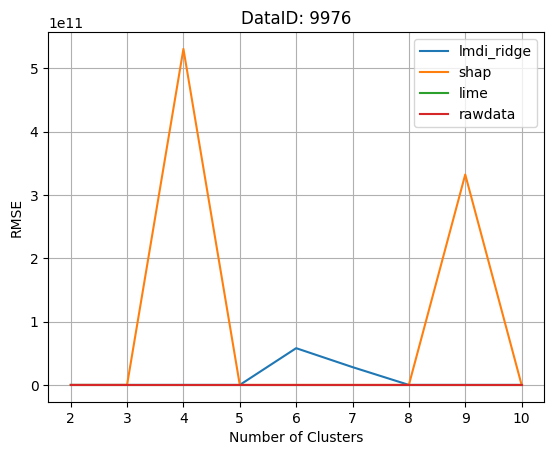

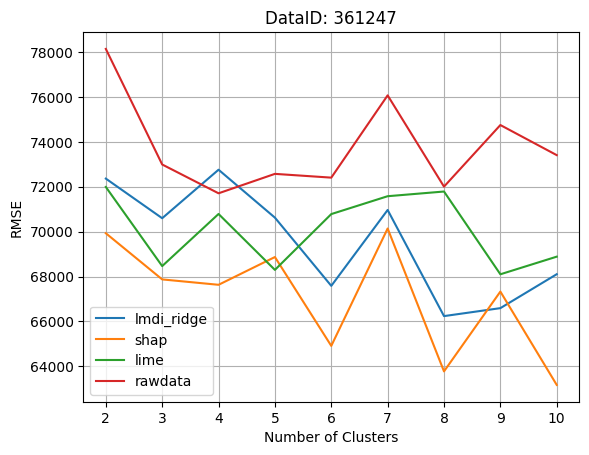

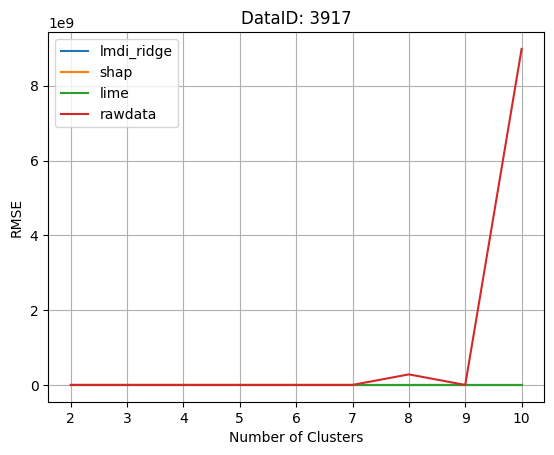

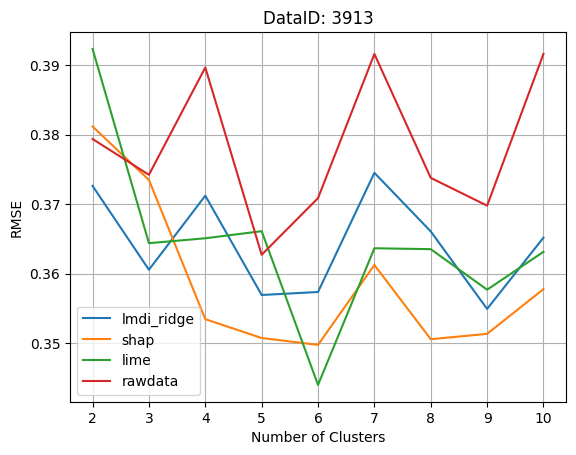

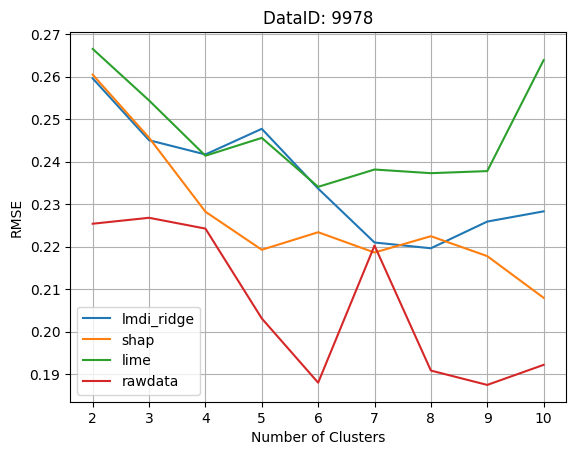

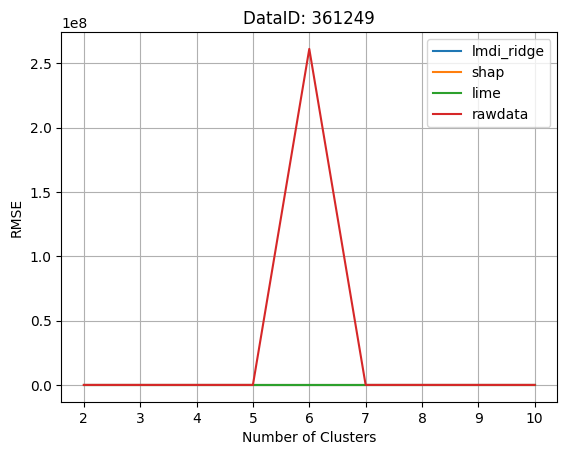

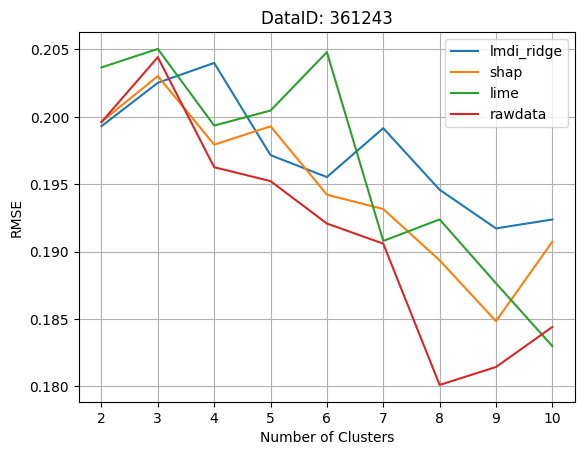

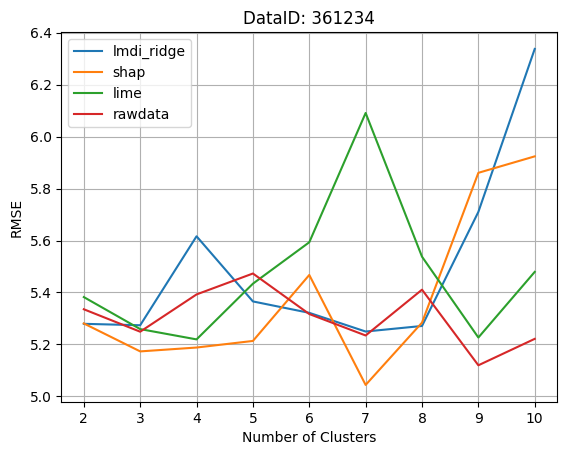

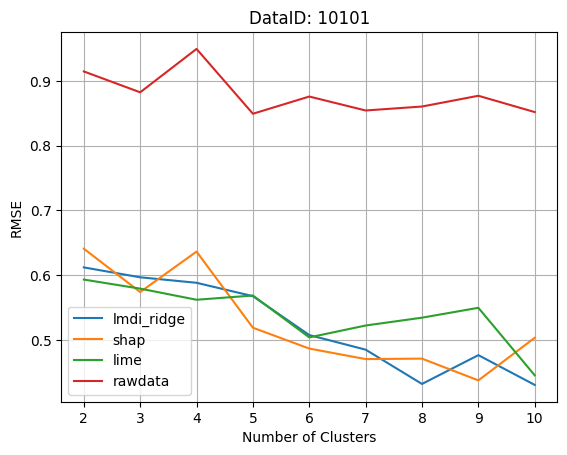

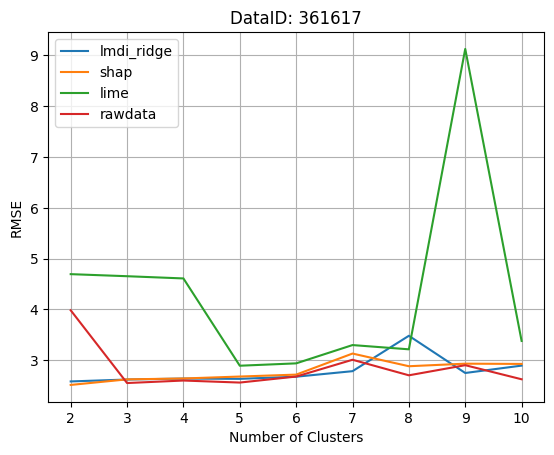

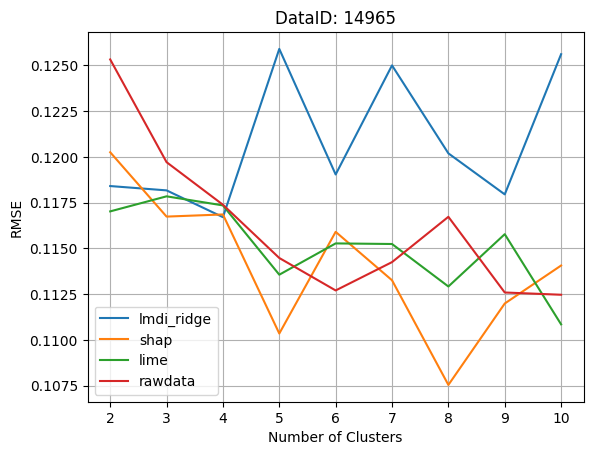

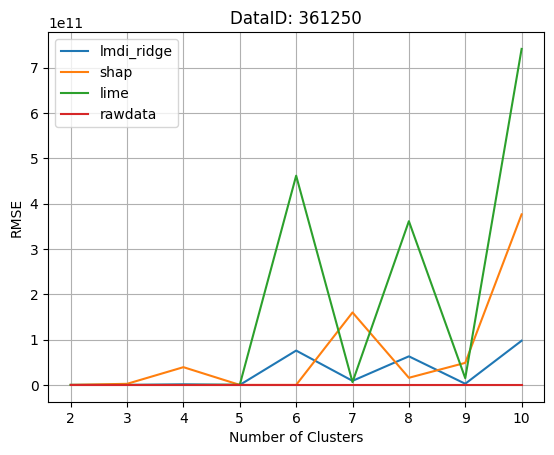

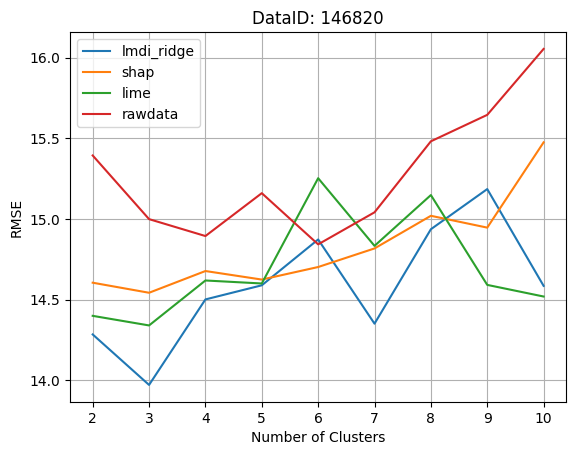

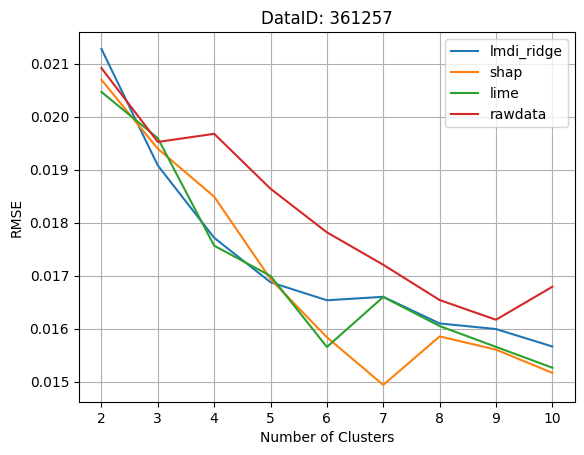

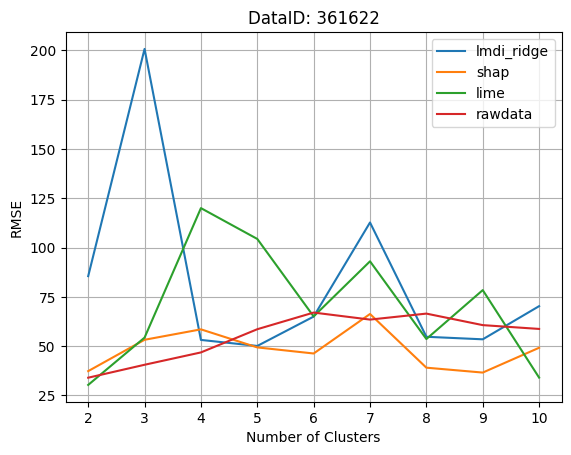

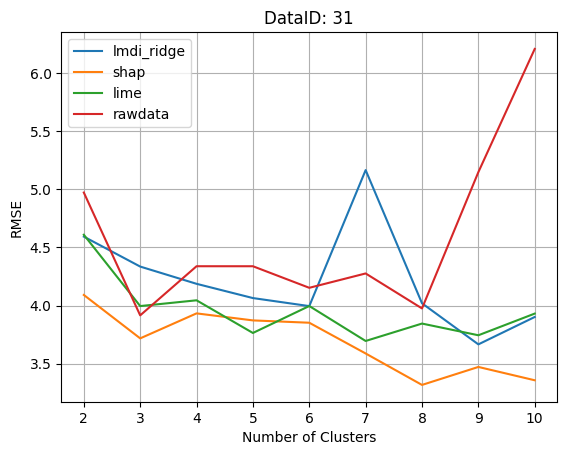

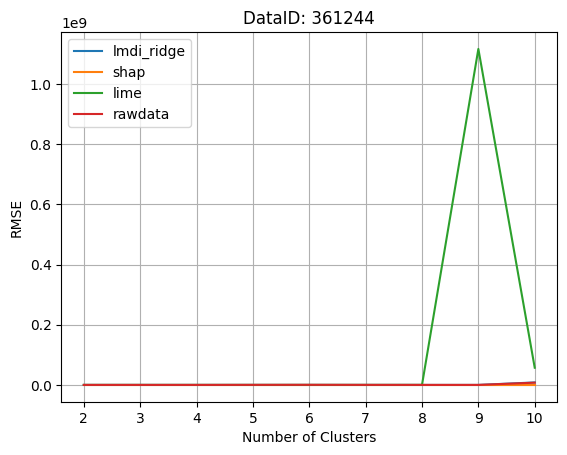

In [17]:
# plot the data, with nclust on x-axis and the rest being lines
i = 0
for data_result in data_results:
    data_result = data_result.set_index("nclust")
    data_result.plot(grid=True)
    # y axis label is RMSE
    plt.ylabel("RMSE")
    # x axis label is number of clusters
    plt.xlabel("Number of Clusters")
    # title is the dataid
    plt.title("DataID: " + dataids[i])
    # move legend to side
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # remove legend
    #plt.legend().remove()
    # show legend
    plt.legend()
    plt.show()
    i+=1


In [18]:
data_results[0]

,nclust,lmdi_ridge,shap,lime,rawdata
0,2,1.866249e+09,2.048186e+09,5.276825e+07,3.437753e+08
1,3,4.688789e+09,4.815873e+08,3.146967e+09,1.938586e+09
2,4,2.136069e+08,8.668755e+08,2.952833e+09,4.719427e+09
3,5,2.741610e+09,2.237728e+09,3.717341e+08,3.805131e+08
4,6,2.834394e+07,7.772313e-01,5.253683e+08,1.671354e+09
5,7,1.587444e+09,6.329133e+08,8.666135e-01,6.533625e+09
6,8,9.548187e+08,3.338103e+07,9.061299e-01,2.926234e+09
7,9,4.199973e+09,1.828156e+08,1.022672e+00,3.783191e+09
8,10,1.342997e+06,8.751049e-01,1.085139e+00,1.871336e+09


In [19]:
# plot the data, only shap and aloo_l2_unsigned_nonnormed_leafavg_rank
# i=0
# for data_result in data_results:
#     data_result = data_result.set_index("nclust")
#     data_result[["shap", "nonloo_l2_signed_nonnormed_leafavg_rank"]].plot(grid=True)
#     # move legend to side
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     # call aloo_l2_unsigned_nonnormed_leafavg_rank lmdi+
#     plt.legend(["SHAP", "LMDI+"])
#     # y axis label is RMSE
#     plt.ylabel("RMSE")
#     # x axis label is number of clusters
#     plt.xlabel("Number of Clusters")
#     # title is the dataid
#     plt.title("DataID: " + dataids[i])
#     plt.show()
#     i+=1

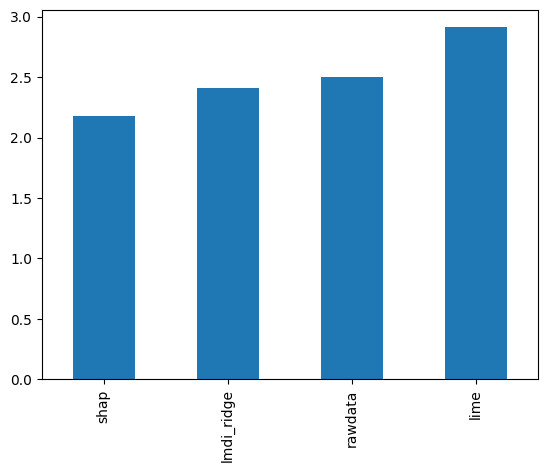

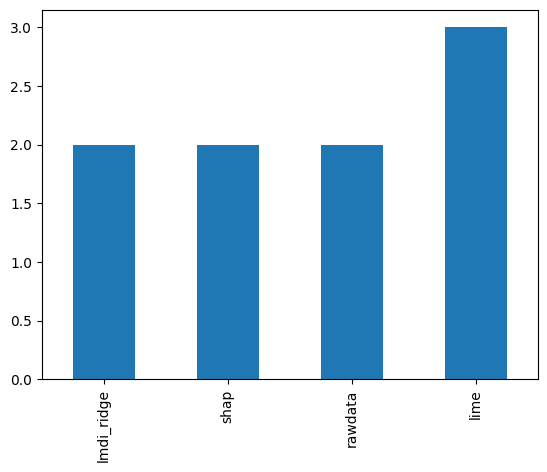

In [20]:
auroc_ranks = []
for data_result in data_results:
    auroc = data_result.drop("nclust", axis=1).apply(np.trapz, x=data_result["nclust"])
    # convert to ranking, i.e. 1 is lowest, 2 is second lowest, etc.
    auroc_rank = auroc.rank()
    auroc_ranks.append(auroc_rank)
# merge series in auroc_ranks by averaging the ranks corresponding to the same names
auroc_ranks = pd.concat(auroc_ranks, axis=1)
auroc_ranks_mean = auroc_ranks.mean(axis=1)
auroc_ranks_median = auroc_ranks.median(axis=1)
auroc_ranks_mean = auroc_ranks_mean.sort_values()
auroc_ranks_median = auroc_ranks_median.sort_values()
auroc_ranks_mean.plot(kind="bar")
plt.show()
auroc_ranks_median.plot(kind="bar")
plt.show()

In [21]:
auroc_ranks

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
lmdi_ridge,3.0,2.0,3.0,2.0,1.0,4.0,2.0,4.0,2.0,2.0,...,3.0,2.0,2.0,4.0,2.0,1.0,3.0,4.0,3.0,2.0
shap,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,3.0,...,2.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0
lime,2.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,...,4.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,2.0,4.0
rawdata,4.0,4.0,1.0,4.0,2.0,2.0,1.0,2.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,4.0,3.0


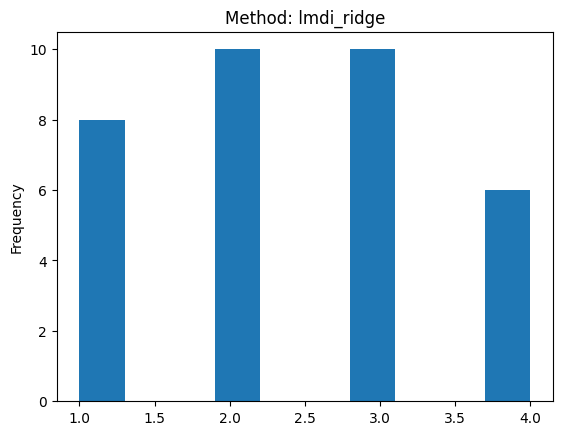

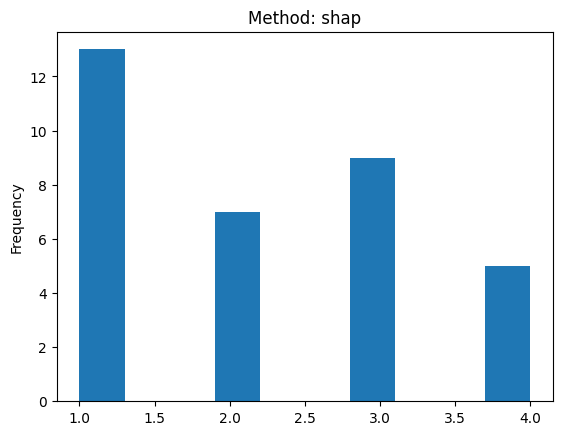

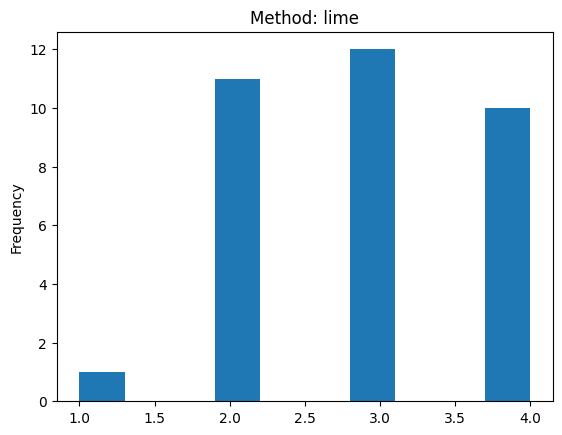

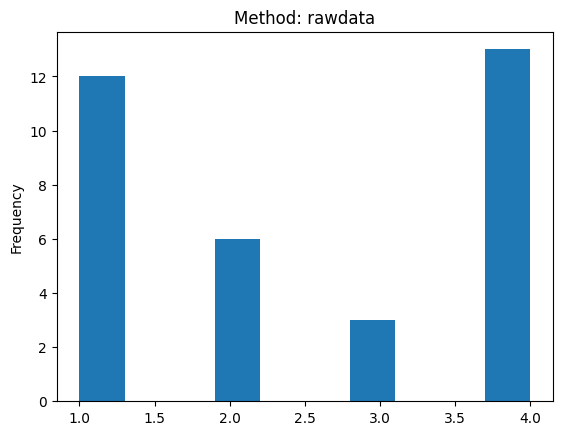

In [22]:
# for each row in auroc_ranks, plot a histogram of the ranks
for i in range(auroc_ranks.shape[0]):
    auroc_ranks.iloc[i].plot(kind="hist")
    plt.title("Method: " + auroc_ranks.index[i])
    plt.show()

    